# **⋰ Random Forest ⋱**

Neste documento, estou utilizando a base de dados `'dataframes\weather_play.csv'` para fazer a predição usando o algoritmo Random Forest. Os detalhes de funcionamento estão contidos na wiki.


### 📍 **Importação de Bibliotecas, Módulos e Variáveis**

In [2]:
%pip -q install plotly --upgrade

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pickle
with open('../dataframes/pickle/weather_play.pkl', 'rb') as f:
    X_weather, y_weather = pickle.load(f)

In [34]:
from sklearn.model_selection import train_test_split

In [44]:
X_weather_training_set, X_weather_test_set, y_weather_training_set, y_weather_test_set = train_test_split(X_weather, y_weather, test_size=0.20, random_state=0)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
random_forest_weather = RandomForestClassifier(n_estimators=60, criterion='gini', max_features='sqrt', random_state=0)
random_forest_weather.fit(X_weather_training_set, y_weather_training_set)

RandomForestClassifier(n_estimators=60, random_state=0)

In [72]:
predictor = random_forest_weather.predict(X_weather_test_set)
predictor

array([' sim', ' sim', ' sim'], dtype=object)

In [73]:
y_weather_test_set

array([' sim', ' sim', ' sim'], dtype=object)

In [74]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_weather_test_set, predictor)

1.0

1.0

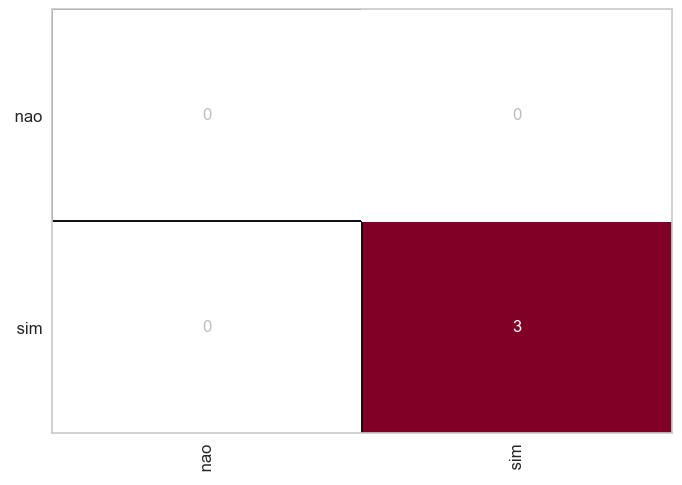

In [75]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_weather)
cm.fit(X_weather_training_set, y_weather_training_set)
cm.score(X_weather_test_set, y_weather_test_set)

In [76]:
print(classification_report(y_weather_test_set, predictor))

              precision    recall  f1-score   support

         sim       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [79]:
X_weather_test = np.array([0, 1, 1, 1])
X_weather_test_reshaped = X_weather_test.reshape(1, -1)

predictor_test = random_forest_weather.predict(X_weather_test_reshaped)
predictor_test

array([' nao'], dtype=object)